In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# cos

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))

# Actual Label과 Predict Label이 같은 경우만 필터링
matched_df = df[df['Actual Label'] == df['Predicted Label']]

# 각 레이블 종류별로 개수 확인
label_counts = matched_df['Actual Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# 결과 출력
print(label_counts)

# 결과를 엑셀 파일로 저장
#label_counts.to_excel("/mnt/data/matched_label_counts.xlsx", index=False)


                       Label  Count
0   (0, 0, 0, 0, 1, 0, 1, 0)    870
1   (0, 0, 1, 0, 1, 0, 0, 0)    521
2   (1, 0, 0, 0, 1, 0, 0, 0)    384
3   (0, 0, 1, 0, 0, 0, 1, 0)    345
4   (0, 1, 0, 1, 0, 0, 0, 0)    196
5   (1, 0, 0, 0, 0, 0, 1, 0)    129
6   (1, 0, 0, 1, 0, 0, 0, 0)    125
7   (1, 0, 1, 0, 0, 0, 0, 0)    106
8   (0, 1, 0, 0, 1, 0, 0, 0)     61
9   (0, 1, 1, 0, 0, 0, 0, 0)     45
10  (0, 1, 0, 0, 0, 0, 1, 0)      8
11  (0, 0, 0, 1, 1, 0, 0, 0)      1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: Undefi

Overall Metrics:
Accuracy: 0.21469230769230768
F1-Score: 0.4724789171573901
Recall: 0.46889375
Precision: 0.5359080226385491

Metrics per Position:
Position 0: Accuracy: 0.8196153846153846, F1-Score: 0.7049943389105549, Recall: 0.7005, Precision: 0.709546720688782
Position 1: Accuracy: 0.7921538461538462, F1-Score: 0.7106446776611695, Recall: 0.8295, Precision: 0.6215811165230424
Position 2: Accuracy: 0.5846153846153846, F1-Score: 0.4297782470960929, Recall: 0.50875, Precision: 0.3720292504570384
Position 3: Accuracy: 0.9029230769230769, F1-Score: 0.8552420279880707, Recall: 0.932, Precision: 0.7901653242899533
Position 4: Accuracy: 0.7993076923076923, F1-Score: 0.6548485249371611, Recall: 0.495, Precision: 0.9671746776084408
Position 5: Accuracy: 1.0, F1-Score: 0.0, Recall: 0.0, Precision: 0.0
Position 6: Accuracy: 0.7021538461538461, F1-Score: 0.424323520666072, Recall: 0.2854, Precision: 0.8267670915411356
Position 7: Accuracy: 0.8276923076923077, F1-Score: 0.0, Recall: 0.0, Precisi

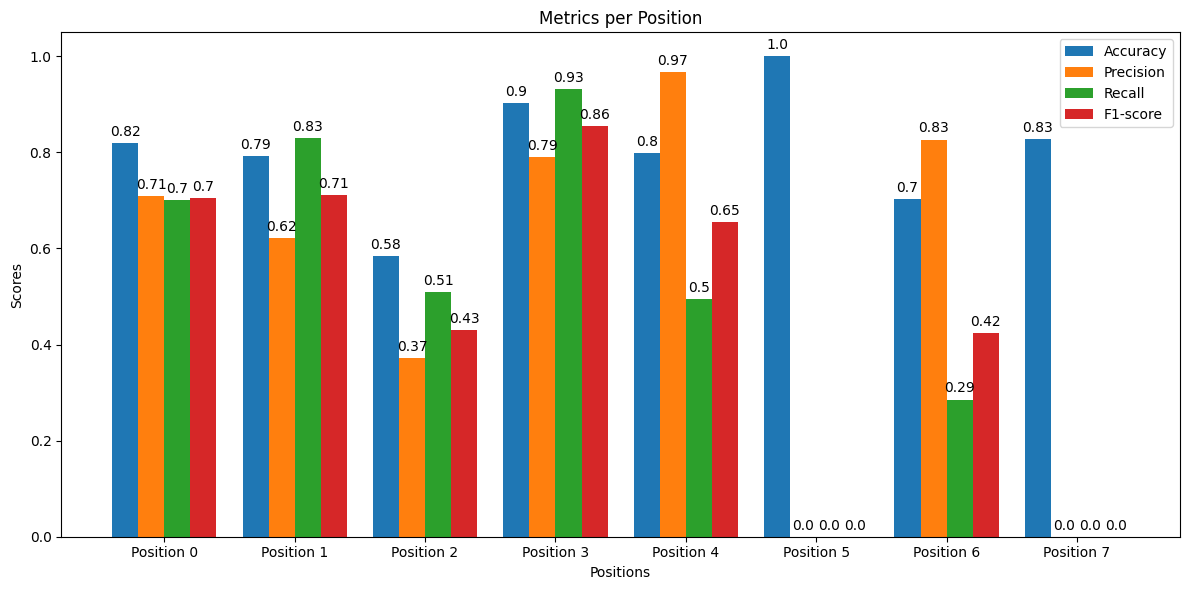

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# Accuracy, F1-Score, Recall, Precision 계산 (전체)
accuracy = accuracy_score(y_true_df, y_pred_df)
f1 = f1_score(y_true_df, y_pred_df, average='macro')
recall = recall_score(y_true_df, y_pred_df, average='macro')
precision = precision_score(y_true_df, y_pred_df, average='macro')

# 각 위치별로 Accuracy, F1-Score, Recall, Precision 계산
accuracy_per_label = [accuracy_score(y_true_df.iloc[:, i], y_pred_df.iloc[:, i]) for i in range(y_true_df.shape[1])]
f1_per_label = f1_score(y_true_df, y_pred_df, average=None)
recall_per_label = recall_score(y_true_df, y_pred_df, average=None)
precision_per_label = precision_score(y_true_df, y_pred_df, average=None)

# 결과 출력
print("Overall Metrics:")
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

print("\nMetrics per Position:")
for i, (acc, f1_l, recall_l, precision_l) in enumerate(zip(accuracy_per_label, f1_per_label, recall_per_label, precision_per_label)):
    print(f"Position {i}: Accuracy: {acc}, F1-Score: {f1_l}, Recall: {recall_l}, Precision: {precision_l}")

# 막대 그래프 도식화
labels = [f'Position {i}' for i in range(len(accuracy_per_label))]
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5 * width, accuracy_per_label, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precision_per_label, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recall_per_label, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1_per_label, width, label='F1-score')

# 그래프에 레이블 추가
ax.set_xlabel('Positions')
ax.set_ylabel('Scores')
ax.set_title('Metrics per Position')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 그래프에 값 표시
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))

# Actual Label 종류와 개수 확인
actual_label_counts = df['Actual Label'].value_counts().reset_index()
actual_label_counts.columns = ['Label', 'Count']

# Predict Label 종류와 개수 확인
predict_label_counts = df['Predicted Label'].value_counts().reset_index()
predict_label_counts.columns = ['Label', 'Count']

# 결과 출력
print("Actual Label 종류와 개수:")
print(actual_label_counts)

print("\nPredict Label 종류와 개수:")
print(predict_label_counts)


Actual Label 종류와 개수:
                       Label  Count
0   (1, 0, 1, 0, 0, 0, 0, 0)   1000
1   (1, 0, 0, 1, 0, 0, 0, 0)   1000
2   (1, 0, 0, 0, 1, 0, 0, 0)   1000
3   (1, 0, 0, 0, 0, 0, 1, 0)   1000
4   (0, 1, 1, 0, 0, 0, 0, 0)   1000
5   (0, 1, 0, 1, 0, 0, 0, 0)   1000
6   (0, 1, 0, 0, 1, 0, 0, 0)   1000
7   (0, 1, 0, 0, 0, 0, 1, 0)   1000
8   (0, 0, 1, 0, 1, 0, 0, 0)   1000
9   (0, 0, 0, 1, 1, 0, 0, 0)   1000
10  (0, 0, 0, 0, 1, 0, 1, 0)   1000
11  (0, 0, 1, 0, 0, 0, 1, 0)   1000
12  (0, 0, 0, 1, 0, 0, 1, 0)   1000

Predict Label 종류와 개수:
                       Label  Count
0   (0, 0, 1, 1, 0, 0, 0, 0)   4338
1   (1, 1, 0, 0, 0, 0, 0, 0)   3016
2   (0, 1, 0, 0, 0, 0, 0, 1)   1977
3   (0, 0, 0, 0, 1, 0, 1, 0)   1167
4   (0, 0, 1, 0, 1, 0, 0, 0)    551
5   (1, 0, 0, 0, 1, 0, 0, 0)    526
6   (0, 0, 1, 0, 0, 0, 1, 0)    413
7   (0, 0, 0, 0, 1, 0, 0, 1)    250
8   (0, 1, 0, 1, 0, 0, 0, 0)    221
9   (1, 0, 0, 1, 0, 0, 0, 0)    157
10  (1, 0, 0, 0, 0, 0, 1, 0)    138
11  (1, 0, 1, 0, 0, 

In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))

# Actual Label과 Predict Label을 문자열로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: ''.join(map(str, x)))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: ''.join(map(str, x)))

# Actual Label과 Predict Label의 조합에 따른 개수를 교차표로 생성
cross_tab = pd.crosstab(df['Actual Label'], df['Predicted Label'])

# 결과 출력
print(cross_tab)

# 결과를 보기 쉽게 저장
#cross_tab.to_excel("/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/soft_co+eu_cosine_confusion_matrix_cross_tab.xlsx")


Predicted Label  00001001  00001010  00010001  00011000  00100001  00100010  \
Actual Label                                                                  
00001010               61       870         0         0         0         3   
00010010                0         0         0         0         0         0   
00011000                5         0         1         1         1         0   
00100010                0        32         0         0         3       345   
00101000              177       176         0         0         1        52   
01000010                0         0         0         0         0         0   
01001000                0         0         0         0         0         0   
01010000                0         0         0         0         0         0   
01100000                0         0         0         0         1         0   
10000010                0        36         0         0         0         4   
10001000                7        52         0       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

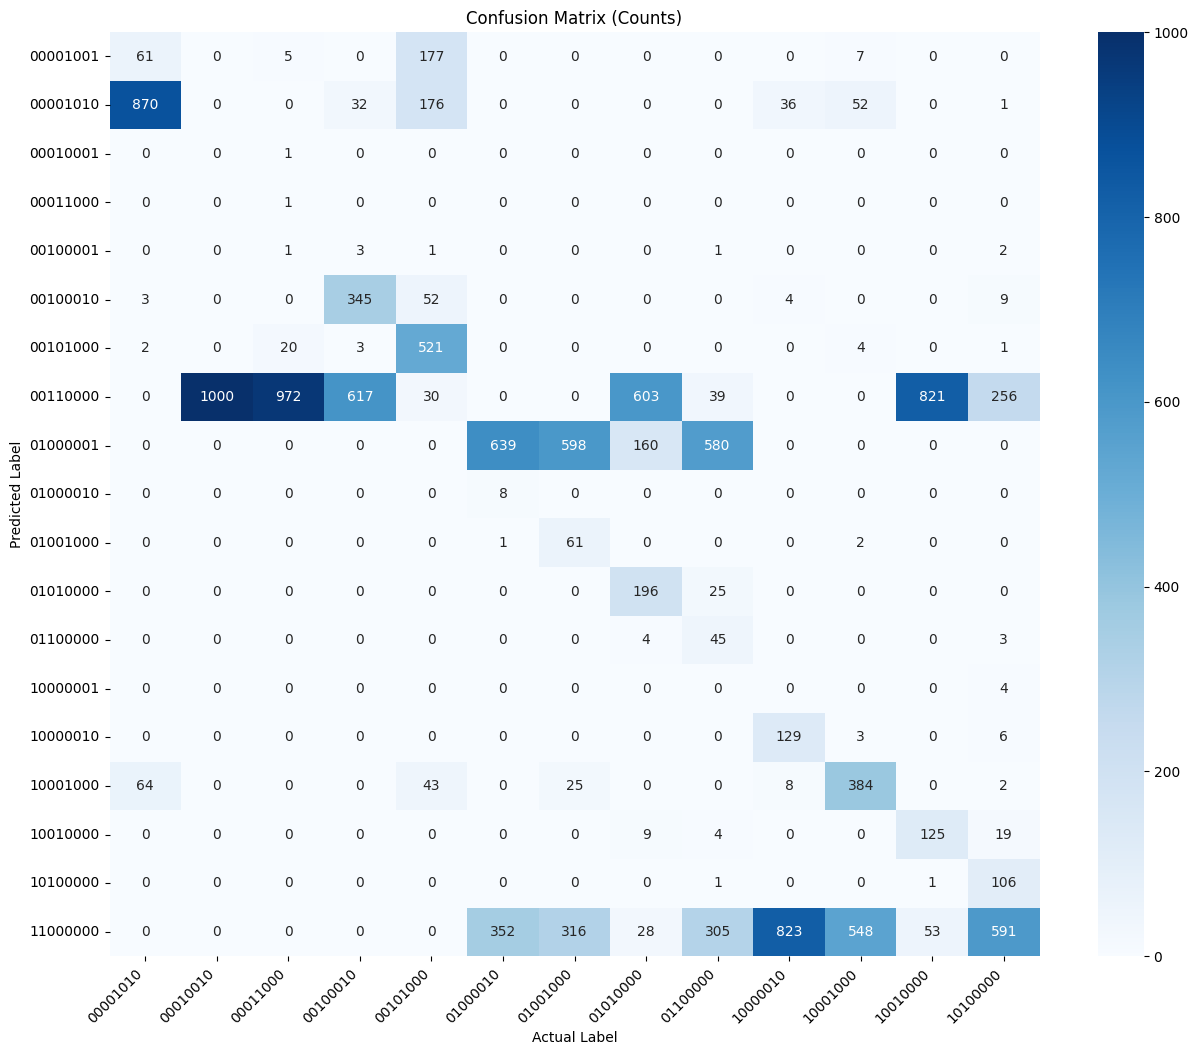

In [ ]:

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
def convert_to_tuple(label):
    label = label.strip('[]').split()
    label = [int(x) for x in label]
    return tuple(label)

df['Actual Label'] = df['Actual Label'].apply(convert_to_tuple)
df['Predicted Label'] = df['Predicted Label'].apply(convert_to_tuple)

# Actual Label과 Predict Label을 문자열로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: ''.join(map(str, x)))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: ''.join(map(str, x)))

# Actual Label과 Predict Label의 고유한 값을 확인
actual_labels = sorted(df['Actual Label'].unique())
predict_labels = sorted(df['Predicted Label'].unique())

# 혼동 행렬 생성
cross_tab = pd.crosstab(df['Predicted Label'], df['Actual Label'], rownames=['Predicted Label'], colnames=['Actual Label'])

#cross_tab = pd.crosstab(df['Actual Label'], df['Predict Label'], rownames=['Actual Label'], colnames=['Predict Label'])

# 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix (Counts)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

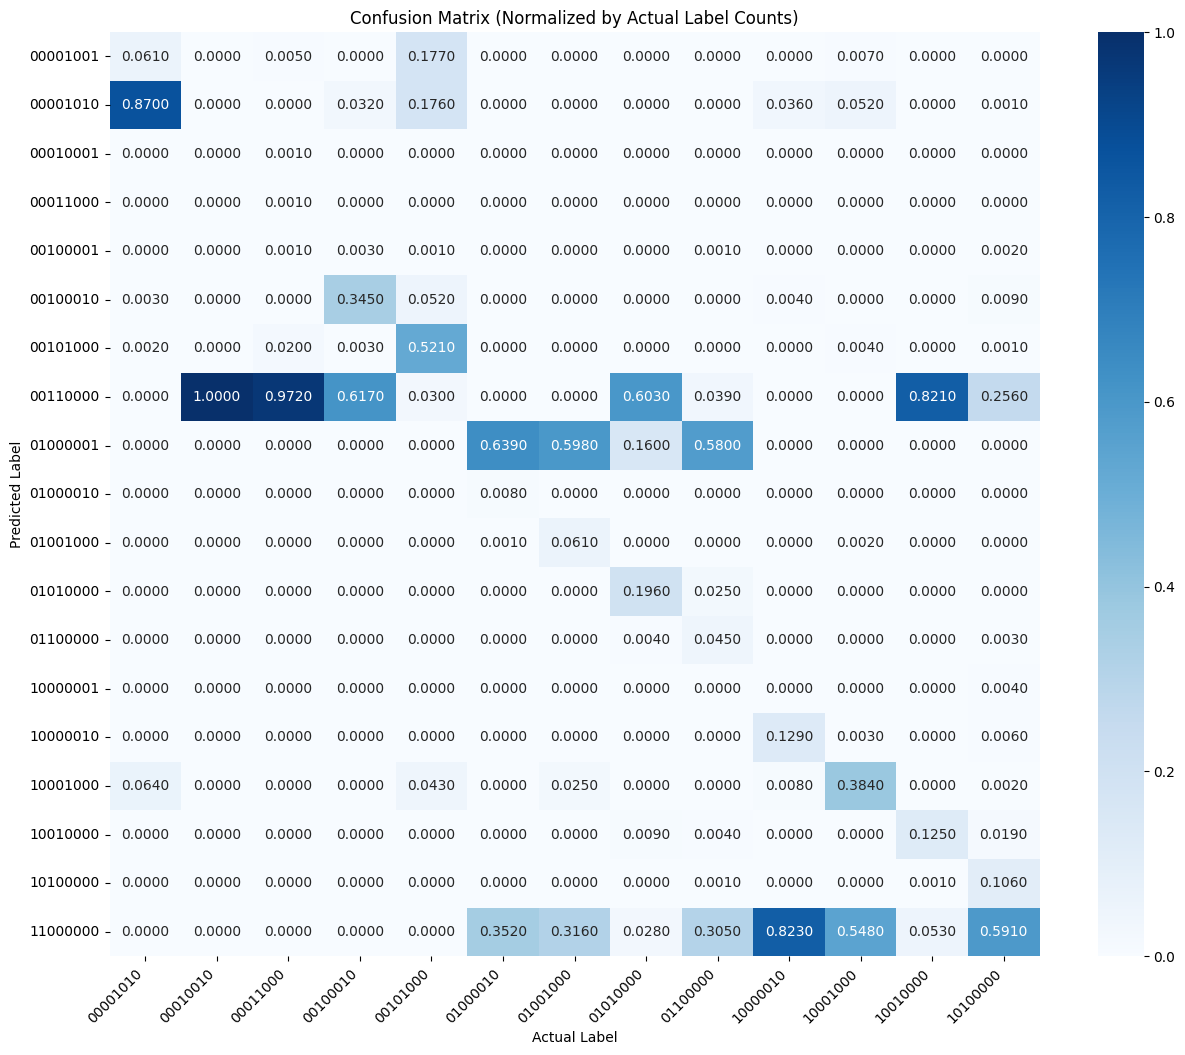

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
def convert_to_tuple(label):
    label = label.strip('[]').split()
    label = [int(x) for x in label]
    return tuple(label)

df['Actual Label'] = df['Actual Label'].apply(convert_to_tuple)
df['Predicted Label'] = df['Predicted Label'].apply(convert_to_tuple)

# Actual Label과 Predict Label을 문자열로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: ''.join(map(str, x)))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: ''.join(map(str, x)))

# 혼동 행렬 생성
cross_tab = pd.crosstab(df['Predicted Label'], df['Actual Label'], rownames=['Predicted Label'], colnames=['Actual Label'])

# 비율 계산을 위해 각 Actual Label의 총 개수를 구함
actual_label_counts = df['Actual Label'].value_counts()

# 비율로 변환
cross_tab_ratio = cross_tab.div(actual_label_counts, axis=1)

# 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(cross_tab_ratio, annot=True, fmt='.4f', cmap='Blues', cbar=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix (Normalized by Actual Label Counts)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


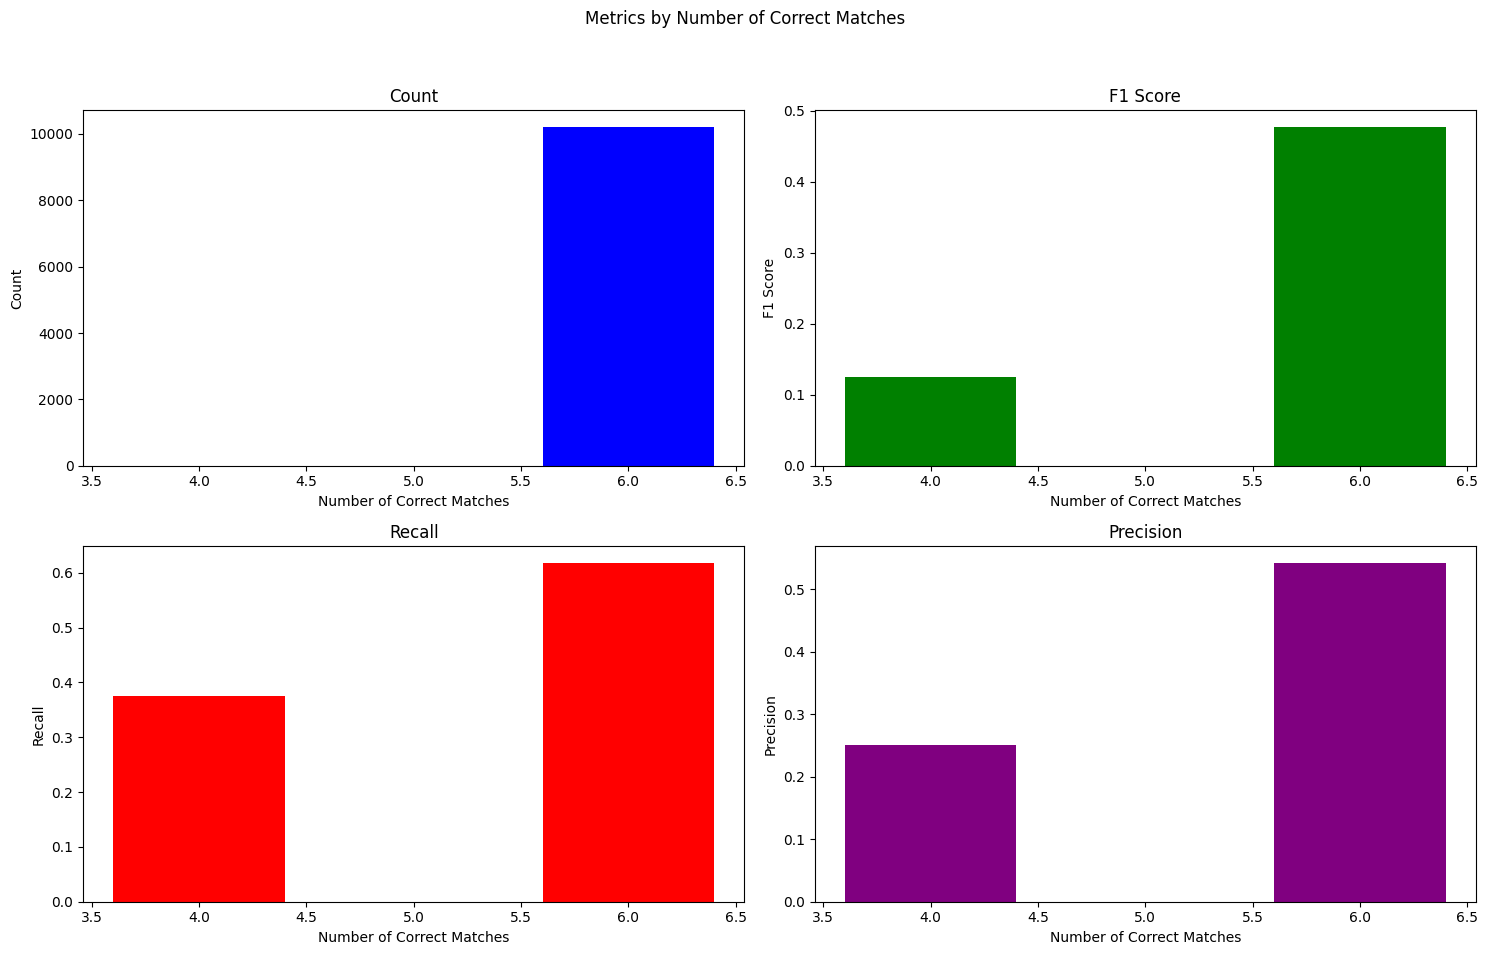

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'


# 파일 읽기
df = pd.read_excel(file_path)


# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# 맞춘 개수를 세는 함수
def count_correct_matches(true_row, pred_row):
    return sum(t == p for t, p in zip(true_row, pred_row))

# 각 행별로 맞춘 개수 계산
df['correct_matches'] = [count_correct_matches(t, p) for t, p in zip(y_true_df.values, y_pred_df.values)]

# 1개부터 7개까지 맞춘 경우에 대한 count, f1, recall, precision 계산
results = []
for i in range(1, 8):
    mask = df['correct_matches'] == i
    if mask.sum() > 0:
        f1 = f1_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        recall = recall_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        precision = precision_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        results.append({
            'correct_matches': i,
            'count': mask.sum(),
            'f1': f1,
            'recall': recall,
            'precision': precision
        })

results_df = pd.DataFrame(results)

# 결과를 파일로 저장
#output_file_path = '/mnt/data/metrics_by_correct_matches.xlsx'
#results_df.to_excel(output_file_path, index=False)

# 막대 그래프 도식화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Metrics by Number of Correct Matches')

# Count
axes[0, 0].bar(results_df['correct_matches'], results_df['count'], color='blue')
axes[0, 0].set_title('Count')
axes[0, 0].set_xlabel('Number of Correct Matches')
axes[0, 0].set_ylabel('Count')

# F1 Score
axes[0, 1].bar(results_df['correct_matches'], results_df['f1'], color='green')
axes[0, 1].set_title('F1 Score')
axes[0, 1].set_xlabel('Number of Correct Matches')
axes[0, 1].set_ylabel('F1 Score')

# Recall
axes[1, 0].bar(results_df['correct_matches'], results_df['recall'], color='red')
axes[1, 0].set_title('Recall')
axes[1, 0].set_xlabel('Number of Correct Matches')
axes[1, 0].set_ylabel('Recall')

# Precision
axes[1, 1].bar(results_df['correct_matches'], results_df['precision'], color='purple')
axes[1, 1].set_title('Precision')
axes[1, 1].set_xlabel('Number of Correct Matches')
axes[1, 1].set_ylabel('Precision')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


   correct_matches  count
0                4      6
1                6  10203
2                8   2791
   correct_matches  precision    recall        f1
0                4   0.250000  0.375000  0.125000
1                6   0.541411  0.617348  0.476511
2                8   1.000000  1.000000  1.000000


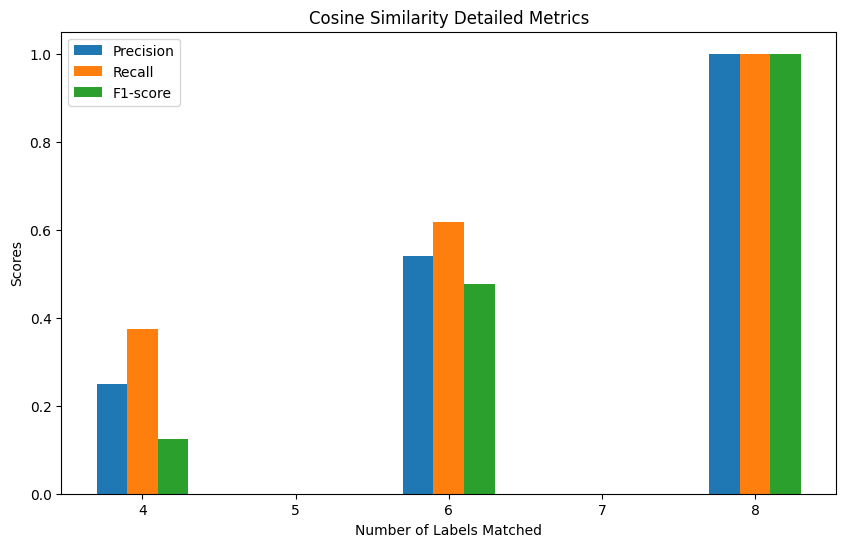

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# 맞춘 개수를 세는 함수
def count_correct_matches(true_row, pred_row):
    return sum(t == p for t, p in zip(true_row, pred_row))

# 각 행별로 맞춘 개수 계산
df['correct_matches'] = [count_correct_matches(t, p) for t, p in zip(y_true_df.values, y_pred_df.values)]

# 1개부터 8개까지 맞춘 경우에 대한 count, f1, recall, precision 계산
results = []
for i in range(1, 9):
    mask = df['correct_matches'] == i
    if mask.sum() > 0:
        f1 = f1_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        recall = recall_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        precision = precision_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        results.append({
            'correct_matches': i,
            'count': mask.sum(),
            'f1': f1,
            'recall': recall,
            'precision': precision
        })

results_df = pd.DataFrame(results)

# 결과를 파일로 저장
#output_file_path = '/mnt/data/metrics_by_correct_matches.xlsx'
#results_df.to_excel(output_file_path, index=False)

# Count 출력
print(results_df[['correct_matches', 'count']])
print(results_df[['correct_matches', 'precision', 'recall', 'f1']])

# 막대 그래프 도식화
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

ax.bar(results_df['correct_matches'] - width, results_df['precision'], width, label='Precision')
ax.bar(results_df['correct_matches'], results_df['recall'], width, label='Recall')
ax.bar(results_df['correct_matches'] + width, results_df['f1'], width, label='F1-score')

ax.set_xlabel('Number of Labels Matched')
ax.set_ylabel('Scores')
ax.set_title('Cosine Similarity Detailed Metrics')
ax.legend()

plt.show()


   correct_matches  count     tp     fp     fn     tn
0                4      6      0     12     12     24
1                6  10203  10203  10203  10203  51015
2                8   2791   5582      0      0  16746


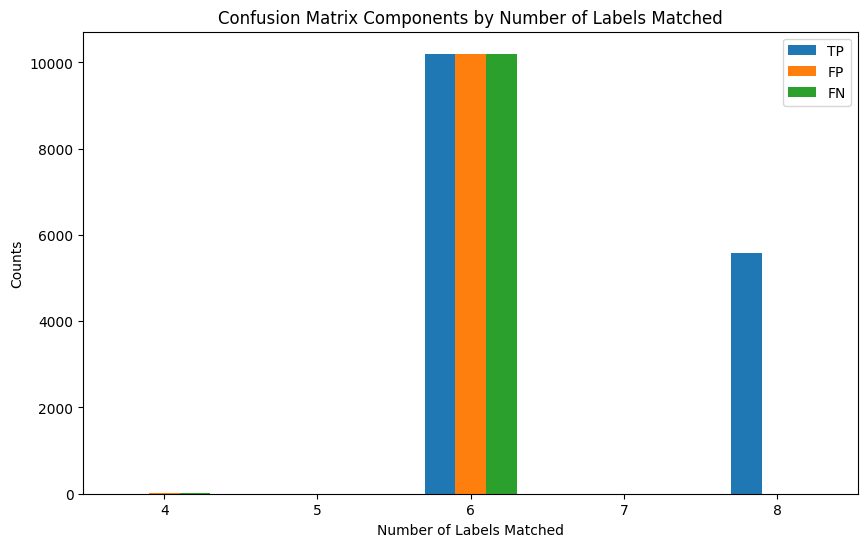

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_cosine.xlsx'


# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# 맞춘 개수를 세는 함수
def count_correct_matches(true_row, pred_row):
    return sum(t == p for t, p in zip(true_row, pred_row))

# 각 행별로 맞춘 개수 계산
df['correct_matches'] = [count_correct_matches(t, p) for t, p in zip(y_true_df.values, y_pred_df.values)]

# TP, FP, FN, TN 계산 함수
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    if len(cm) == 1:  # Only one class present in y_true
        tn, fp, fn, tp = 0, 0, 0, cm[0]
    else:
        tn, fp, fn, tp = cm
    return tp, fp, fn, tn

# 각 매치 개수별로 TP, FP, FN, TN 계산
results = []
for i in range(1, 9):
    mask = df['correct_matches'] == i
    if mask.sum() > 0:
        y_true_masked = y_true_df[mask].values.flatten()
        y_pred_masked = y_pred_df[mask].values.flatten()
        tp, fp, fn, tn = calculate_metrics(y_true_masked, y_pred_masked)
        results.append({
            'correct_matches': i,
            'count': mask.sum(),
            'tp': tp,
            'fp': fp,
            'fn': fn,
            'tn': tn
        })

results_df = pd.DataFrame(results)

# 결과 출력
print(results_df)

# 결과를 파일로 저장
#output_file_path = '/mnt/data/metrics_by_correct_matches_with_confusion_matrix.xlsx'
#results_df.to_excel(output_file_path, index=False)

# 막대 그래프 도식화
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

ax.bar(results_df['correct_matches'] - width, results_df['tp'], width, label='TP')
ax.bar(results_df['correct_matches'], results_df['fp'], width, label='FP')
ax.bar(results_df['correct_matches'] + width, results_df['fn'], width, label='FN')

ax.set_xlabel('Number of Labels Matched')
ax.set_ylabel('Counts')
ax.set_title('Confusion Matrix Components by Number of Labels Matched')
ax.legend()

plt.show()


# 유클

In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))

# Actual Label과 Predict Label이 같은 경우만 필터링
matched_df = df[df['Actual Label'] == df['Predicted Label']]

# 각 레이블 종류별로 개수 확인
label_counts = matched_df['Actual Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# 결과 출력
print(label_counts)

# 결과를 엑셀 파일로 저장
#label_counts.to_excel("/mnt/data/matched_label_counts.xlsx", index=False)


                      Label  Count
0  (0, 0, 0, 0, 1, 0, 1, 0)    837
1  (0, 0, 1, 0, 1, 0, 0, 0)    651
2  (1, 0, 1, 0, 0, 0, 0, 0)    616
3  (0, 0, 1, 0, 0, 0, 1, 0)    500
4  (1, 0, 0, 0, 1, 0, 0, 0)    404
5  (1, 0, 0, 0, 0, 0, 1, 0)    168
6  (0, 1, 1, 0, 0, 0, 0, 0)     75
7  (0, 1, 0, 0, 1, 0, 0, 0)     52
8  (0, 1, 0, 0, 0, 0, 1, 0)      1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: Undefi

Overall Metrics:
Accuracy: 0.2541538461538462
F1-Score: 0.4862486984960053
Recall: 0.47656249999999994
Precision: 0.5564705205267124

Metrics per Position:
Position 0: Accuracy: 0.8256153846153846, F1-Score: 0.7239741872640935, Recall: 0.74325, Precision: 0.7056729171611679
Position 1: Accuracy: 0.8068461538461539, F1-Score: 0.7102135025966532, Recall: 0.76925, Precision: 0.6595927116827438
Position 2: Accuracy: 0.5990769230769231, F1-Score: 0.5055028462998103, Recall: 0.666, Precision: 0.4073394495412844
Position 3: Accuracy: 0.8997692307692308, F1-Score: 0.8354590226038642, Recall: 0.827, Precision: 0.8440928808369482
Position 4: Accuracy: 0.8004615384615384, F1-Score: 0.6555112881806109, Recall: 0.4936, Precision: 0.9754940711462451
Position 5: Accuracy: 1.0, F1-Score: 0.0, Recall: 0.0, Precision: 0.0
Position 6: Accuracy: 0.7162307692307692, F1-Score: 0.4593287410230104, Recall: 0.3134, Precision: 0.85957213384531
Position 7: Accuracy: 0.8223076923076923, F1-Score: 0.0, Recall: 0.0

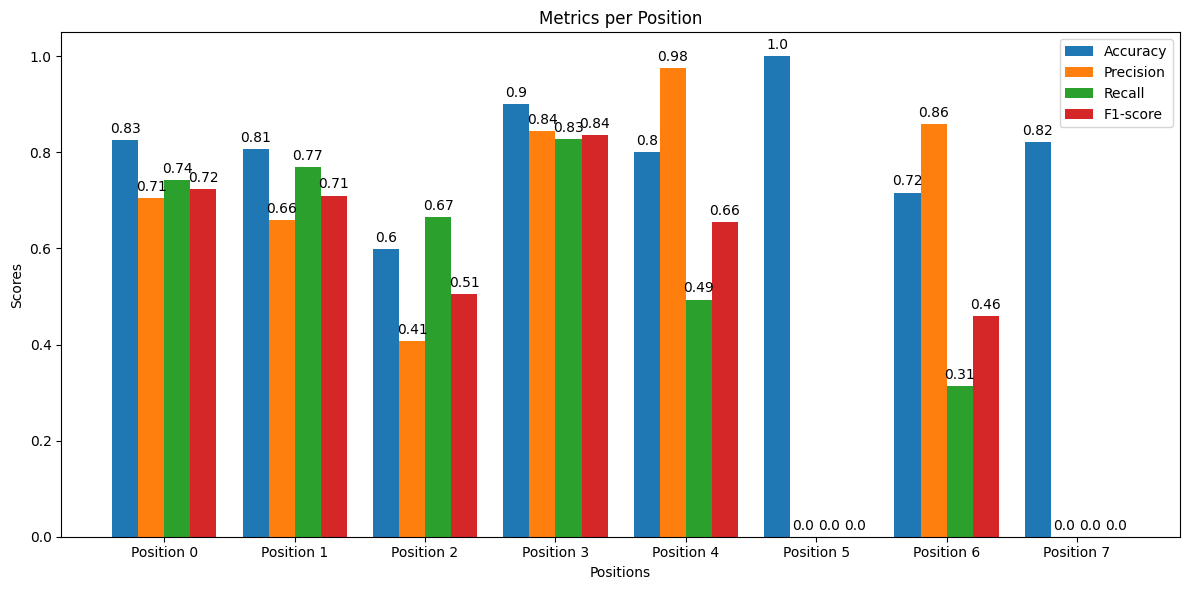

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# Accuracy, F1-Score, Recall, Precision 계산 (전체)
accuracy = accuracy_score(y_true_df, y_pred_df)
f1 = f1_score(y_true_df, y_pred_df, average='macro')
recall = recall_score(y_true_df, y_pred_df, average='macro')
precision = precision_score(y_true_df, y_pred_df, average='macro')

# 각 위치별로 Accuracy, F1-Score, Recall, Precision 계산
accuracy_per_label = [accuracy_score(y_true_df.iloc[:, i], y_pred_df.iloc[:, i]) for i in range(y_true_df.shape[1])]
f1_per_label = f1_score(y_true_df, y_pred_df, average=None)
recall_per_label = recall_score(y_true_df, y_pred_df, average=None)
precision_per_label = precision_score(y_true_df, y_pred_df, average=None)

# 결과 출력
print("Overall Metrics:")
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

print("\nMetrics per Position:")
for i, (acc, f1_l, recall_l, precision_l) in enumerate(zip(accuracy_per_label, f1_per_label, recall_per_label, precision_per_label)):
    print(f"Position {i}: Accuracy: {acc}, F1-Score: {f1_l}, Recall: {recall_l}, Precision: {precision_l}")

# 막대 그래프 도식화
labels = [f'Position {i}' for i in range(len(accuracy_per_label))]
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5 * width, accuracy_per_label, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precision_per_label, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recall_per_label, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1_per_label, width, label='F1-score')

# 그래프에 레이블 추가
ax.set_xlabel('Positions')
ax.set_ylabel('Scores')
ax.set_title('Metrics per Position')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 그래프에 값 표시
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'


# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))

# Actual Label 종류와 개수 확인
actual_label_counts = df['Actual Label'].value_counts().reset_index()
actual_label_counts.columns = ['Label', 'Count']

# Predict Label 종류와 개수 확인
predict_label_counts = df['Predicted Label'].value_counts().reset_index()
predict_label_counts.columns = ['Label', 'Count']

# 결과 출력
print("Actual Label 종류와 개수:")
print(actual_label_counts)

print("\nPredict Label 종류와 개수:")
print(predict_label_counts)


Actual Label 종류와 개수:
                       Label  Count
0   (1, 0, 1, 0, 0, 0, 0, 0)   1000
1   (1, 0, 0, 1, 0, 0, 0, 0)   1000
2   (1, 0, 0, 0, 1, 0, 0, 0)   1000
3   (1, 0, 0, 0, 0, 0, 1, 0)   1000
4   (0, 1, 1, 0, 0, 0, 0, 0)   1000
5   (0, 1, 0, 1, 0, 0, 0, 0)   1000
6   (0, 1, 0, 0, 1, 0, 0, 0)   1000
7   (0, 1, 0, 0, 0, 0, 1, 0)   1000
8   (0, 0, 1, 0, 1, 0, 0, 0)   1000
9   (0, 0, 0, 1, 1, 0, 0, 0)   1000
10  (0, 0, 0, 0, 1, 0, 1, 0)   1000
11  (0, 0, 1, 0, 0, 0, 1, 0)   1000
12  (0, 0, 0, 1, 0, 0, 1, 0)   1000

Predict Label 종류와 개수:
                       Label  Count
0   (0, 0, 1, 1, 0, 0, 0, 0)   3919
1   (1, 1, 0, 0, 0, 0, 0, 0)   2637
2   (0, 1, 0, 0, 0, 0, 0, 1)   1815
3   (0, 0, 0, 0, 1, 0, 1, 0)   1038
4   (1, 0, 1, 0, 0, 0, 0, 0)    833
5   (0, 0, 1, 0, 1, 0, 0, 0)    704
6   (0, 0, 1, 0, 0, 0, 1, 0)    609
7   (1, 0, 0, 0, 1, 0, 0, 0)    562
8   (0, 0, 1, 0, 0, 0, 0, 1)    317
9   (1, 0, 0, 0, 0, 0, 1, 0)    175
10  (0, 0, 0, 0, 1, 0, 0, 1)    172
11  (0, 1, 1, 0, 0, 

In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'

# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: tuple(map(int, x.strip('[]').split())))

# Actual Label과 Predict Label을 문자열로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: ''.join(map(str, x)))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: ''.join(map(str, x)))

# Actual Label과 Predict Label의 조합에 따른 개수를 교차표로 생성
cross_tab = pd.crosstab(df['Actual Label'], df['Predicted Label'])

# 결과 출력
print(cross_tab)

# 결과를 보기 쉽게 저장
#cross_tab.to_excel("/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/cosine_confusion_matrix_cross_tab.xlsx")


Predicted Label  00001001  00001010  00100001  00100010  00101000  00110000  \
Actual Label                                                                  
00001010               63       837         0         8        17         0   
00010010                0         0         0         0         0      1000   
00011000                0         0        73         0        31       896   
00100010                0        13        18       500         2       465   
00101000              103       119        13        82       651         3   
01000010                0         0         0         0         0         0   
01001000                1         1         0         0         0         0   
01010000                0         0       147         0         0       594   
01100000                0         0        64         0         0        32   
10000010                0        21         0        19         0         0   
10001000                5        47         0       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

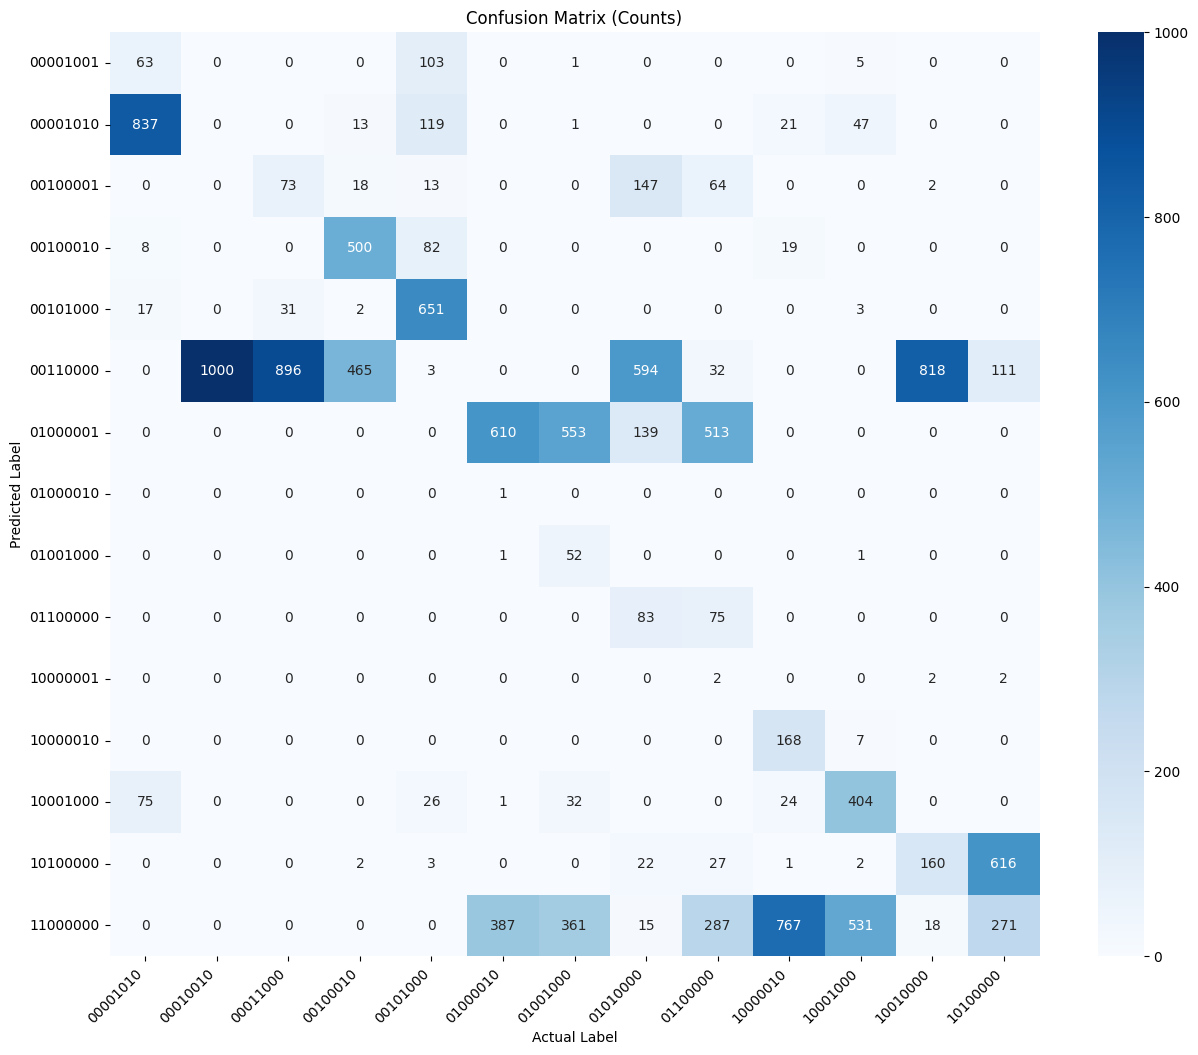

In [ ]:

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'


# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
def convert_to_tuple(label):
    label = label.strip('[]').split()
    label = [int(x) for x in label]
    return tuple(label)

df['Actual Label'] = df['Actual Label'].apply(convert_to_tuple)
df['Predicted Label'] = df['Predicted Label'].apply(convert_to_tuple)

# Actual Label과 Predict Label을 문자열로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: ''.join(map(str, x)))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: ''.join(map(str, x)))

# Actual Label과 Predict Label의 고유한 값을 확인
actual_labels = sorted(df['Actual Label'].unique())
predict_labels = sorted(df['Predicted Label'].unique())

# 혼동 행렬 생성
cross_tab = pd.crosstab(df['Predicted Label'], df['Actual Label'], rownames=['Predicted Label'], colnames=['Actual Label'])

#cross_tab = pd.crosstab(df['Actual Label'], df['Predict Label'], rownames=['Actual Label'], colnames=['Predict Label'])

# 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix (Counts)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

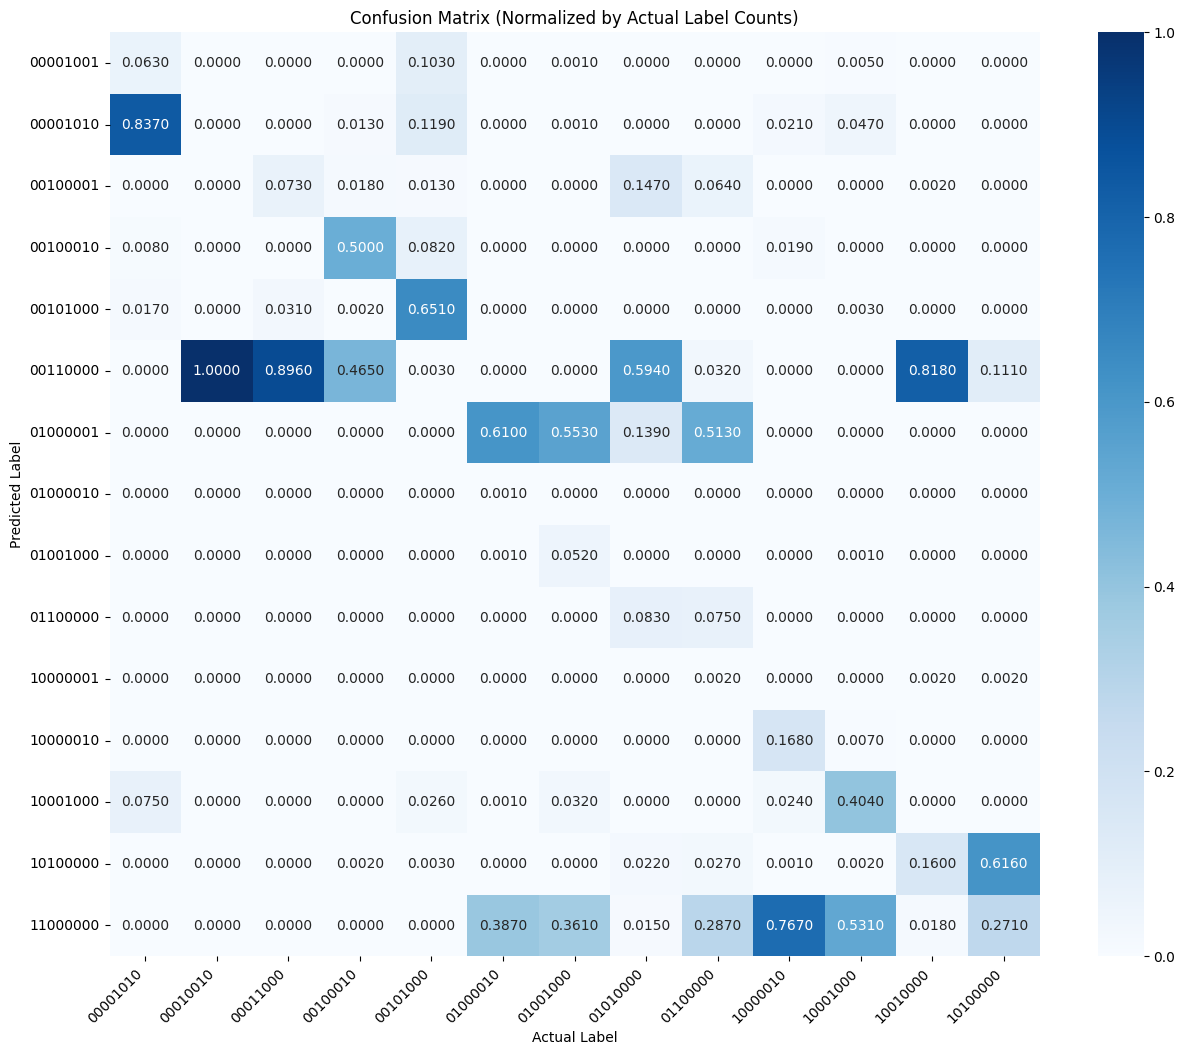

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'


# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 튜플로 변환
def convert_to_tuple(label):
    label = label.strip('[]').split()
    label = [int(x) for x in label]
    return tuple(label)

df['Actual Label'] = df['Actual Label'].apply(convert_to_tuple)
df['Predicted Label'] = df['Predicted Label'].apply(convert_to_tuple)

# Actual Label과 Predict Label을 문자열로 변환
df['Actual Label'] = df['Actual Label'].apply(lambda x: ''.join(map(str, x)))
df['Predicted Label'] = df['Predicted Label'].apply(lambda x: ''.join(map(str, x)))

# 혼동 행렬 생성
cross_tab = pd.crosstab(df['Predicted Label'], df['Actual Label'], rownames=['Predicted Label'], colnames=['Actual Label'])

# 비율 계산을 위해 각 Actual Label의 총 개수를 구함
actual_label_counts = df['Actual Label'].value_counts()

# 비율로 변환
cross_tab_ratio = cross_tab.div(actual_label_counts, axis=1)

# 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(cross_tab_ratio, annot=True, fmt='.4f', cmap='Blues', cbar=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix (Normalized by Actual Label Counts)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


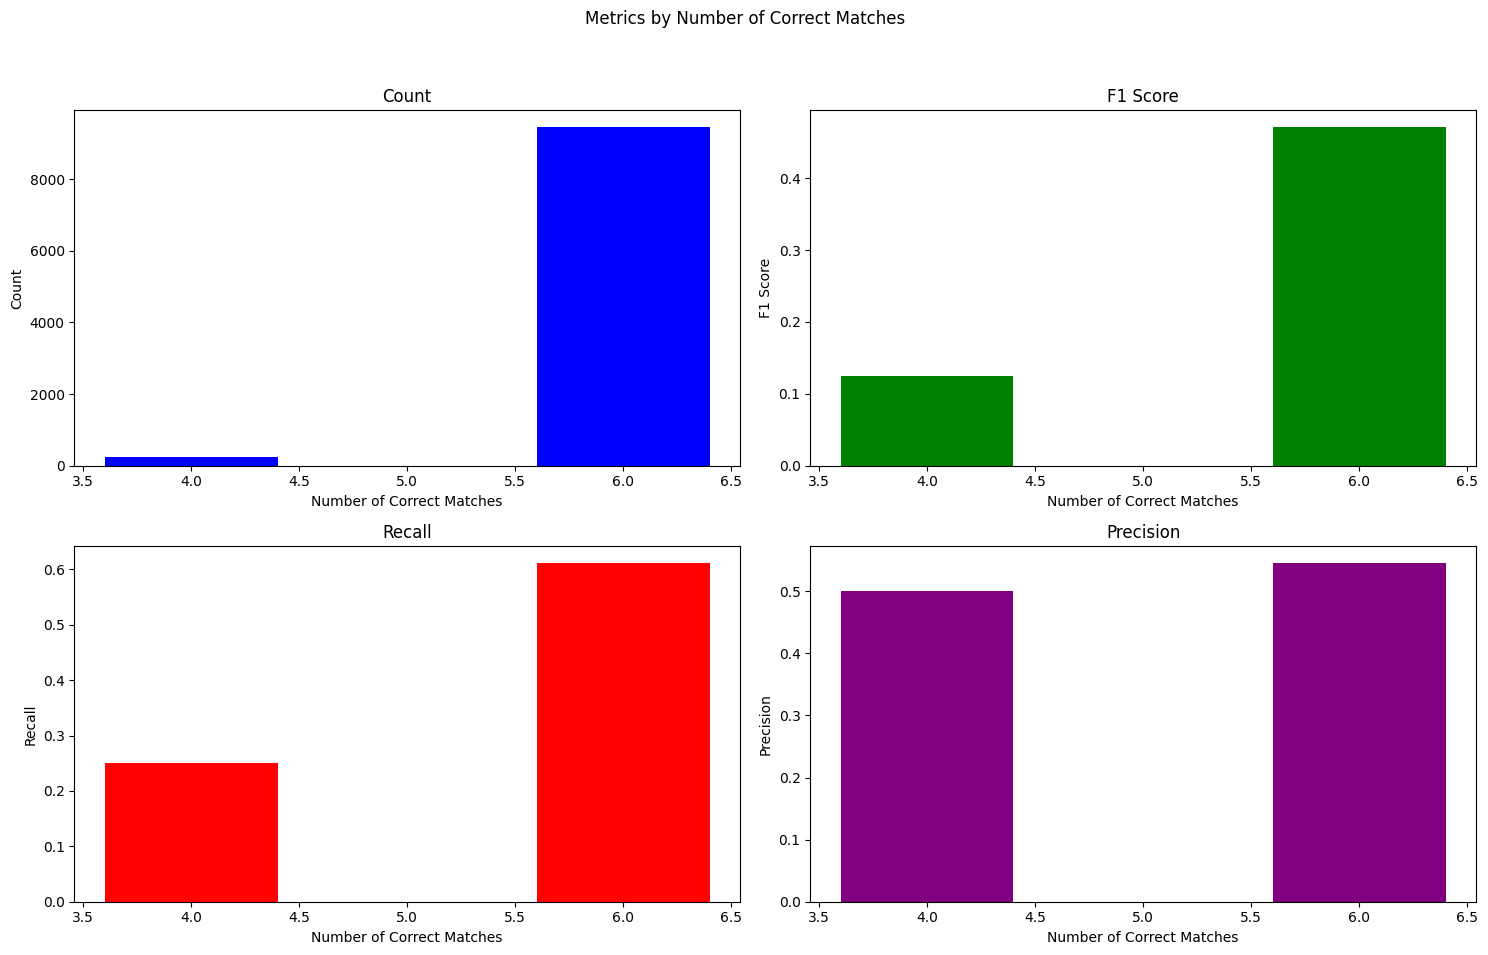

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'



# 파일 읽기
df = pd.read_excel(file_path)


# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# 맞춘 개수를 세는 함수
def count_correct_matches(true_row, pred_row):
    return sum(t == p for t, p in zip(true_row, pred_row))

# 각 행별로 맞춘 개수 계산
df['correct_matches'] = [count_correct_matches(t, p) for t, p in zip(y_true_df.values, y_pred_df.values)]

# 1개부터 7개까지 맞춘 경우에 대한 count, f1, recall, precision 계산
results = []
for i in range(1, 8):
    mask = df['correct_matches'] == i
    if mask.sum() > 0:
        f1 = f1_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        recall = recall_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        precision = precision_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        results.append({
            'correct_matches': i,
            'count': mask.sum(),
            'f1': f1,
            'recall': recall,
            'precision': precision
        })

results_df = pd.DataFrame(results)

# 결과를 파일로 저장
#output_file_path = '/mnt/data/metrics_by_correct_matches.xlsx'
#results_df.to_excel(output_file_path, index=False)

# 막대 그래프 도식화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Metrics by Number of Correct Matches')

# Count
axes[0, 0].bar(results_df['correct_matches'], results_df['count'], color='blue')
axes[0, 0].set_title('Count')
axes[0, 0].set_xlabel('Number of Correct Matches')
axes[0, 0].set_ylabel('Count')

# F1 Score
axes[0, 1].bar(results_df['correct_matches'], results_df['f1'], color='green')
axes[0, 1].set_title('F1 Score')
axes[0, 1].set_xlabel('Number of Correct Matches')
axes[0, 1].set_ylabel('F1 Score')

# Recall
axes[1, 0].bar(results_df['correct_matches'], results_df['recall'], color='red')
axes[1, 0].set_title('Recall')
axes[1, 0].set_xlabel('Number of Correct Matches')
axes[1, 0].set_ylabel('Recall')

# Precision
axes[1, 1].bar(results_df['correct_matches'], results_df['precision'], color='purple')
axes[1, 1].set_title('Precision')
axes[1, 1].set_xlabel('Number of Correct Matches')
axes[1, 1].set_ylabel('Precision')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


   correct_matches  count
0                4    247
1                6   9449
2                8   3304
   correct_matches  precision    recall        f1
0                4   0.500000  0.250000  0.125000
1                6   0.545224  0.610921  0.470871
2                8   1.000000  1.000000  1.000000


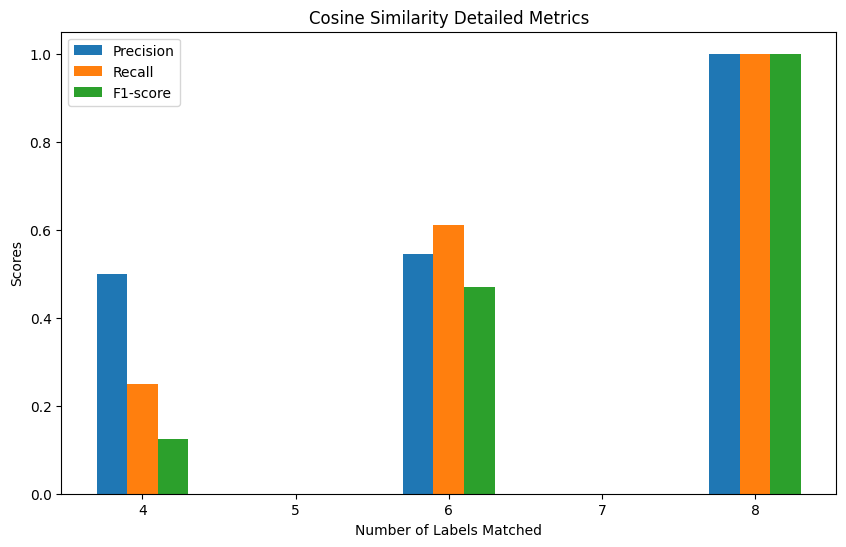

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'


# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# 맞춘 개수를 세는 함수
def count_correct_matches(true_row, pred_row):
    return sum(t == p for t, p in zip(true_row, pred_row))

# 각 행별로 맞춘 개수 계산
df['correct_matches'] = [count_correct_matches(t, p) for t, p in zip(y_true_df.values, y_pred_df.values)]

# 1개부터 8개까지 맞춘 경우에 대한 count, f1, recall, precision 계산
results = []
for i in range(1, 9):
    mask = df['correct_matches'] == i
    if mask.sum() > 0:
        f1 = f1_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        recall = recall_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        precision = precision_score(y_true_df[mask], y_pred_df[mask], average='macro', zero_division=1)
        results.append({
            'correct_matches': i,
            'count': mask.sum(),
            'f1': f1,
            'recall': recall,
            'precision': precision
        })

results_df = pd.DataFrame(results)

# 결과를 파일로 저장
#output_file_path = '/mnt/data/metrics_by_correct_matches.xlsx'
#results_df.to_excel(output_file_path, index=False)

# Count 출력
print(results_df[['correct_matches', 'count']])
print(results_df[['correct_matches', 'precision', 'recall', 'f1']])

# 막대 그래프 도식화
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

ax.bar(results_df['correct_matches'] - width, results_df['precision'], width, label='Precision')
ax.bar(results_df['correct_matches'], results_df['recall'], width, label='Recall')
ax.bar(results_df['correct_matches'] + width, results_df['f1'], width, label='F1-score')

ax.set_xlabel('Number of Labels Matched')
ax.set_ylabel('Scores')
ax.set_title('Cosine Similarity Detailed Metrics')
ax.legend()

plt.show()


   correct_matches  count    tp    fp    fn     tn
0                4    247     0   494   494    988
1                6   9449  9449  9449  9449  47245
2                8   3304  6608     0     0  19824


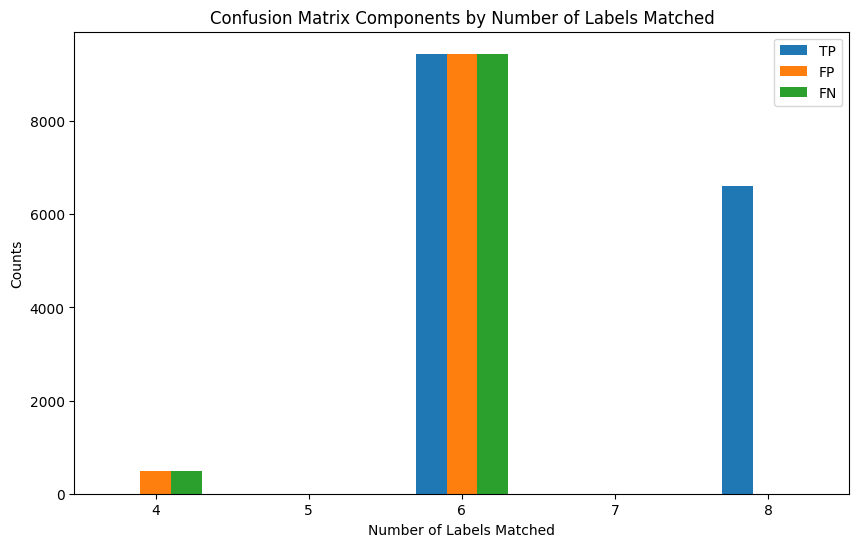

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# 파일 경로
file_path = '/content/drive/MyDrive/반도체 캐글_mix/데이터/이중만_8_2/분석_n2/최종_soft_co+eu_predictions_euclidean (1).xlsx'



# 파일 읽기
df = pd.read_excel(file_path)

# Actual Label과 Predict Label을 리스트로 변환
y_true = df['Actual Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
y_pred = df['Predicted Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

# DataFrame으로 변환
y_true_df = pd.DataFrame(y_true.tolist())
y_pred_df = pd.DataFrame(y_pred.tolist())

# 맞춘 개수를 세는 함수
def count_correct_matches(true_row, pred_row):
    return sum(t == p for t, p in zip(true_row, pred_row))

# 각 행별로 맞춘 개수 계산
df['correct_matches'] = [count_correct_matches(t, p) for t, p in zip(y_true_df.values, y_pred_df.values)]

# TP, FP, FN, TN 계산 함수
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred).ravel()
    if len(cm) == 1:  # Only one class present in y_true
        tn, fp, fn, tp = 0, 0, 0, cm[0]
    else:
        tn, fp, fn, tp = cm
    return tp, fp, fn, tn

# 각 매치 개수별로 TP, FP, FN, TN 계산
results = []
for i in range(1, 9):
    mask = df['correct_matches'] == i
    if mask.sum() > 0:
        y_true_masked = y_true_df[mask].values.flatten()
        y_pred_masked = y_pred_df[mask].values.flatten()
        tp, fp, fn, tn = calculate_metrics(y_true_masked, y_pred_masked)
        results.append({
            'correct_matches': i,
            'count': mask.sum(),
            'tp': tp,
            'fp': fp,
            'fn': fn,
            'tn': tn
        })

results_df = pd.DataFrame(results)

# 결과 출력
print(results_df)

# 결과를 파일로 저장
#output_file_path = '/mnt/data/metrics_by_correct_matches_with_confusion_matrix.xlsx'
#results_df.to_excel(output_file_path, index=False)

# 막대 그래프 도식화
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

ax.bar(results_df['correct_matches'] - width, results_df['tp'], width, label='TP')
ax.bar(results_df['correct_matches'], results_df['fp'], width, label='FP')
ax.bar(results_df['correct_matches'] + width, results_df['fn'], width, label='FN')

ax.set_xlabel('Number of Labels Matched')
ax.set_ylabel('Counts')
ax.set_title('Confusion Matrix Components by Number of Labels Matched')
ax.legend()

plt.show()
